# Diabetes & You

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
from scipy.stats import linregress
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pandas as pd
import os

# Read the CSV and Perform Basic Data Cleaning

In [12]:
df = pd.read_csv(os.path.join("diabetes_best_data.csv"))
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [13]:
#End of dataframe
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [14]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [15]:
df.shape

(520, 17)

In [16]:
#number of items in datafram
len(df)

520

In [17]:
#number dimension of data
df.ndim,df.size

(2, 8840)

In [18]:
#Detect missing values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [20]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})

In [21]:
df["class"].value_counts()

1    320
0    200
Name: class, dtype: int64

In [22]:
target = df["class"]
target_names = ['negative', 'positive']

In [23]:
data = df.drop("class", axis=1)
feature_names = data.columns
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# create a train and test split
    


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# training KNN the model


In [25]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_model.fit(X_train, y_train)
#Making predictions
prediction = knn_model.predict(X_test)
predict_knn = knn_model.score(X_train, y_train)
test_score = knn_model.score(X_test, y_test)

In [26]:
print(predict_knn)

0.9256410256410257


In [27]:
print(test_score)

0.8692307692307693


In [28]:
knn_confusionmatrix=confusion_matrix(y_test, prediction)

[[44  2]
 [15 69]]


Text(0.5, 0, 'Predicted Label')

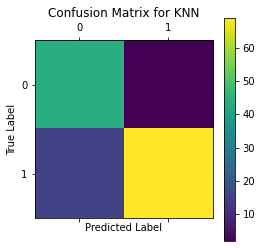

In [29]:
print(knn_confusionmatrix)
plt.matshow(knn_confusionmatrix)
plt.title("Confusion Matrix for KNN")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# GridSeach - Model

In [30]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the Model

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [32]:
print(grid.best_params_)

{'n_neighbors': 1}


# Predicting Model

In [33]:
# Make predictions with the hypertuned model
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']][: 5]


,mean_test_score,std_test_score,params
0,0.910256,0.026893,{'n_neighbors': 1}
1,0.887179,0.024860,{'n_neighbors': 2}
2,0.902564,0.028782,{'n_neighbors': 3}
3,0.858974,0.026893,{'n_neighbors': 4}
4,0.853846,0.034017,{'n_neighbors': 5}


In [34]:
 print('Test Accuracy: %.3f' % grid.score(X_test, y_test))

Test Accuracy: 0.931


In [35]:
print('Train Accuracy: %.3f' % grid.score(X_train, y_train))

Train Accuracy: 1.000


Text(0, 0.5, 'Cross validated Accuracy')

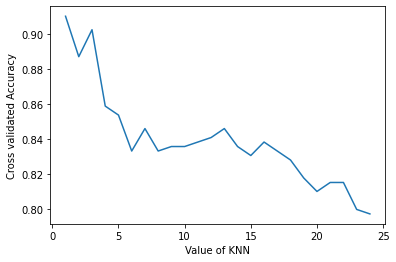

In [36]:
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of KNN')
plt.ylabel('Cross validated Accuracy')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction,
                            target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.75      0.96      0.84        46
    Negative       0.97      0.82      0.89        84

    accuracy                           0.87       130
   macro avg       0.86      0.89      0.86       130
weighted avg       0.89      0.87      0.87       130



In [38]:
#SAVE Model
import joblib
filename = 'grid.joblib'
joblib.dump(grid, filename)

['grid.joblib']